## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#### 1) Linear Congruent
One of the easiest way to make random number is using linear congruential.

$$x_{n+1} = a x_{n} + b \mod k$$

pick a random $a$ and $b$ then try.

In [17]:
x = 3
a = 1103515245
b = 12345
k = 2**31
for i in range(200):
    x = (a*x + b) % k
    print(x)
    
# Cycle length
# Fast like really fast

1163074432
465823161
679304702
544774495
1351511980
1035215989
273505290
1018653819
1598610072
1848611569
1080897238
1111905623
1044187204
1092185389
1424319074
57733107
690250928
726445865
800801454
564172879
467868636
2052592869
1006427066
1098410603
175380936
200940129
1435302278
1689338439
731187828
22870941
1638869010
95796195
1110596064
1779610777
1683207006
1358836543
294859788
584122709
505653098
405587035
1749386488
1676500433
2135740470
1525238583
1841952932
999884301
2064497090
24994771
520092432
1876751881
134328334
623929903
626112572
72739269
1496104730
40073803
1956650024
1605393729
466072294
1886220327
1542378196
1290046589
1171003250
2067195843
1959807040
1412592505
1094727870
2056666399
496085100
668847669
4399818
1131121723
1780932440
548018353
1171825046
1316794647
936810756
102141677
796213538
1896957875
1336295792
509226217
1263160686
55487503
1132856476
1109372581
1196544634
273938987
1916587656
1879150625
85630022
1813384711
1578388276
465964381
508835538
125799

#### 2) Cycle Problem

One of the problem with linear congruent is short cycle length. For example,

$$x_{n+1} =  ax_{n} + b \mod 11$$

No matter what value you give $a$ and $b$. Your cycle length will be at most 11.

#### 3) Fixing Cycle problem

One way to do it is to generate it with a better cycle and then mod 11.

#### 4) Some available random number from numpy/python

`np.random.random` for random a float uniformly between 0 and 1.

`np.random.randint` for random integer uniformly in some range.

`np.random.randn` for random float from normal distribution with mean 0 and standard deviation 1.

(array([2.000e+00, 1.000e+00, 1.600e+01, 3.700e+01, 1.280e+02, 2.550e+02,
        4.770e+02, 8.720e+02, 1.273e+03, 1.406e+03, 1.487e+03, 1.426e+03,
        1.056e+03, 7.670e+02, 4.220e+02, 2.230e+02, 1.160e+02, 2.200e+01,
        9.000e+00, 5.000e+00]),
 array([-4.04678252, -3.65711071, -3.26743891, -2.8777671 , -2.48809529,
        -2.09842348, -1.70875168, -1.31907987, -0.92940806, -0.53973626,
        -0.15006445,  0.23960736,  0.62927917,  1.01895097,  1.40862278,
         1.79829459,  2.1879664 ,  2.5776382 ,  2.96731001,  3.35698182,
         3.74665363]),
 <BarContainer object of 20 artists>)

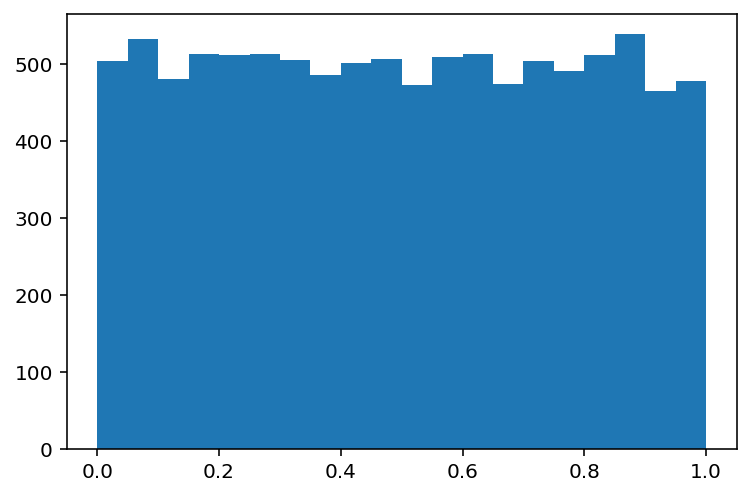

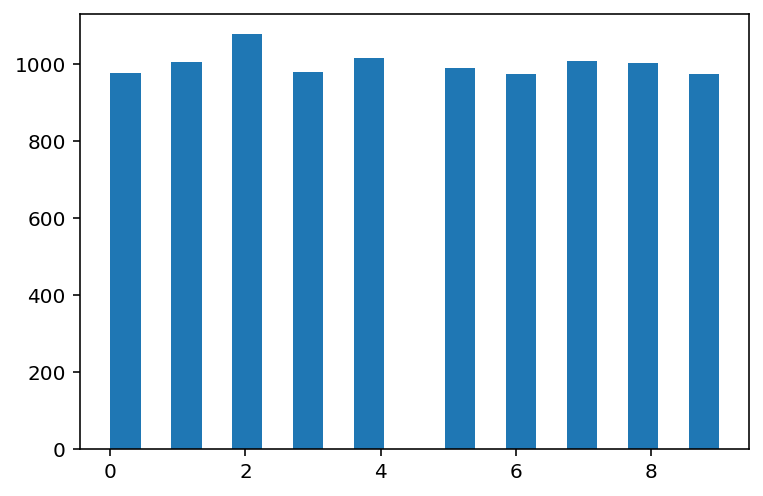

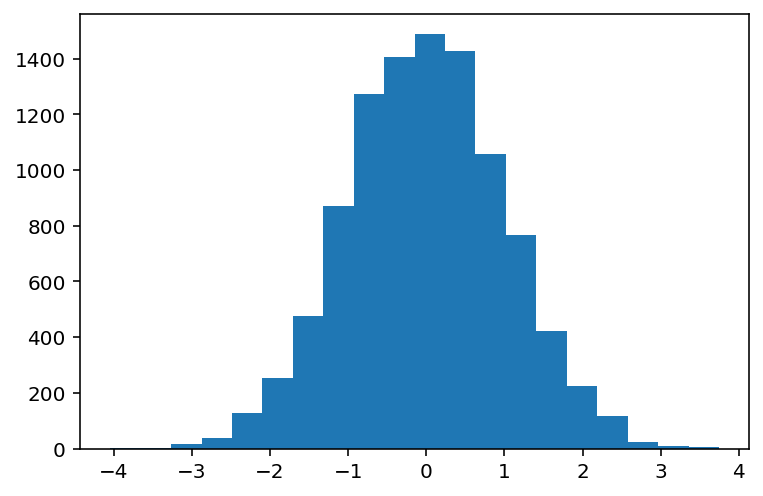

In [38]:
np.random.seed(26283)

numbers = np.random.random(10000)
plt.hist(numbers, bins=20)
plt.figure()

numbers = np.random.randint(0, 10, size=10000)
plt.hist(numbers, bins=20)


plt.figure()

numbers = np.random.randn(10000)
plt.hist(numbers, bins=20)

#### 5) Manipulating random number to get desired behavior.

Random a float from 0 to 5.

Random a float from -1 to 1.

Random a float form normal distribution with mean 5 and std dev 1.

Random a float form normal distribution with mean 2 and std dev 10.

10.030667420411332

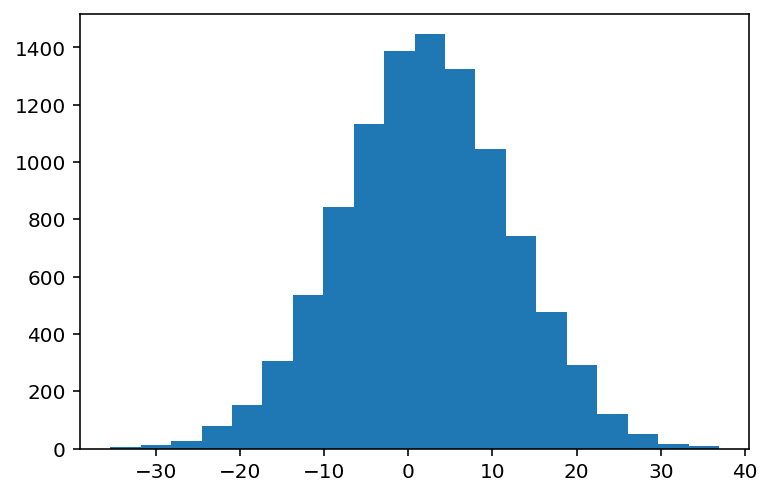

In [49]:
# numbers = np.random.random(10000)*5 # [0-1]*5 --> [0, 5]
# plt.hist(numbers, bins=20)

# numbers = np.random.random(10000)*2 - 1 # [0-1]*5 --> [0, 5]

# plt.hist(numbers, bins=20)


numbers = np.random.randn(10000)*10 + 2# shift the mean
plt.hist(numbers, bins=20)
np.mean(numbers)
np.std(numbers)

6) What does np.random.seed do?

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

3) Do we guarantee to get the same answer when we repeat the experiment?

4) What do we need to do to guarantee the same answer?

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

(array([3018.,    0.,    0.,    0., 2015.,    0.,    0.,    0.,  966.,
           0.,    0.,    0., 2020.,    0.,    0.,    0.,  959.,    0.,
           0., 1022.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <BarContainer object of 20 artists>)

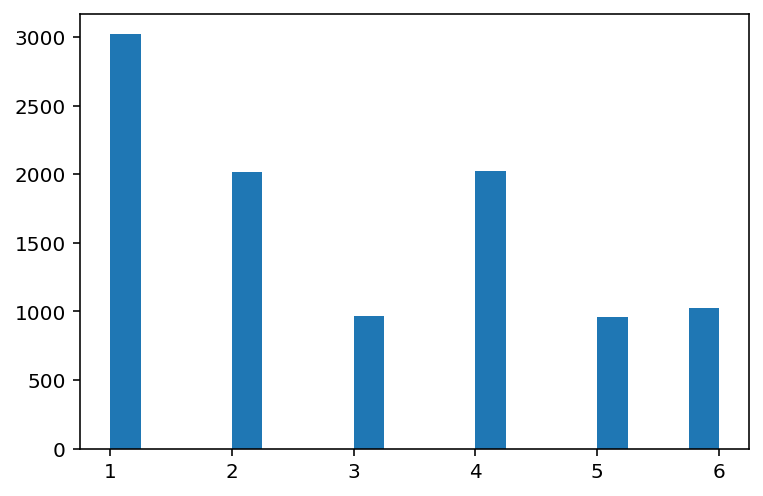

In [57]:
def gacha():
    n = np.random.random() # [0-1] float
    if n < 0.3:
        return 1
    elif n < 0.5:
        return 2
    elif n < 0.6:
        return 3
    elif n < 0.8:
        return 4
    elif n < 0.9:
        return 5
    else:
        return 6
    
numbers = [ gacha() for i in range(10000) ]
plt.hist(numbers, bins=20)

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

(array([ 6215.,     0., 12369.,     0.,     0., 12399.,     0., 12647.,
            0.,     0., 12497.,     0., 12450.,     0.,     0., 12566.,
            0., 12565.,     0.,  6292.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 20 artists>)

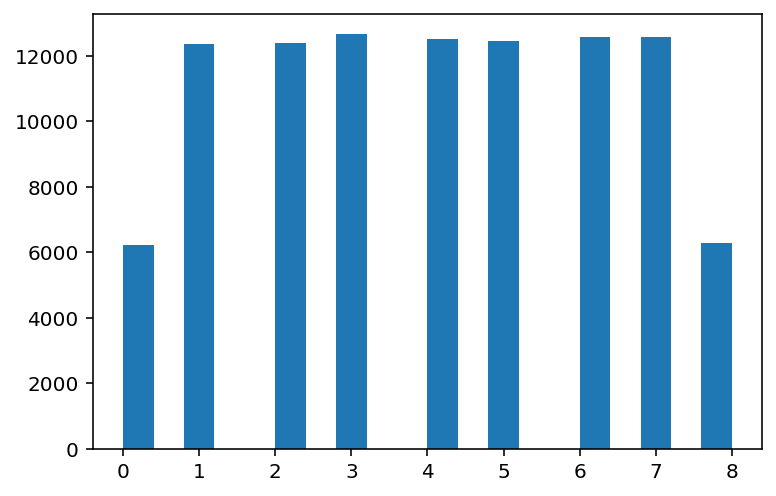

In [54]:
numbers = np.round(np.random.random(100000)*8)

plt.hist(numbers, bins= 20)

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

4) What is the expected value of $AB$?

5) Try the experiment 10,000 times and plot out the probability of getting each result for $AB$. (Probability is given by #of times we get the number/total number of experiment.

6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

3) What is the expected value of the stock at the end of year?

4) What is the variance of the stock at the end of the year?

5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

7) If we buy the stock today at 119.21 dollar and our stragy is that we would sell if the stock fall more than 5 dollar or go up more than 10 dollar.

7.1) What is the probability that we get to sell it?

7.2) If we get to sell it what's the probability of making profit.